<a href="https://colab.research.google.com/github/uc2045/genai-projects/blob/master/030925_Build_a_LLM_powered_Chatbot_in_LangGraph_March2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a LLM-powered Chatbot in LangGraph

LangGraph is not just a framework to create static graphs. We already know that it can be used for building stateful, agentic applications using LLMs.

We'll now create a simple LLM-powered chatbot using LangGraph. This chatbot will respond directly to user messages.

![](https://i.imgur.com/heeggTe.png)

In [ ]:
!pip install langchain==0.3.19
!pip install langgraph==0.3.5
!pip install langchain-openai==0.3.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40


## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

## Create the Nodes, Edges and Graph

In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def chatbot(state: State):
    # get the current state (which is basically the input user prompt)
    state = state['messages']
    llm_response = llm.invoke(state)
    return {"messages": [llm_response]} # appending llm_response to messages key

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

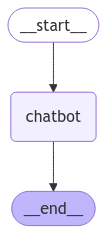

In [ ]:
graph

In [ ]:
response = graph.invoke({"messages": "Explain AI in 2 bullet points"})
response

{'messages': [HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='e639b7d7-8886-43b6-91e0-69a1c7670db9'),
  AIMessage(content='- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think, learn, and perform tasks autonomously, often using algorithms and data to improve their performance over time.\n\n- **Applications and Impact**: AI is utilized across various sectors, including healthcare, finance, and transportation, enhancing efficiency, decision-making, and personalization, while also raising ethical considerations regarding privacy, bias, and job displacement.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 14, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens

In [ ]:
response['messages']

[HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='e639b7d7-8886-43b6-91e0-69a1c7670db9'),
 AIMessage(content='- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think, learn, and perform tasks autonomously, often using algorithms and data to improve their performance over time.\n\n- **Applications and Impact**: AI is utilized across various sectors, including healthcare, finance, and transportation, enhancing efficiency, decision-making, and personalization, while also raising ethical considerations regarding privacy, bias, and job displacement.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 14, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'a

In [ ]:
print(response['messages'][-1].content)

- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think, learn, and perform tasks autonomously, often using algorithms and data to improve their performance over time.

- **Applications and Impact**: AI is utilized across various sectors, including healthcare, finance, and transportation, enhancing efficiency, decision-making, and personalization, while also raising ethical considerations regarding privacy, bias, and job displacement.


## Invoking vs. Streaming in LangGraph

In [ ]:
response = graph.invoke({"messages": "Explain AI in 1 line to a child"})
print(response['messages'][-1].content)

AI is like a smart robot that can learn and help us solve problems or answer questions!


In [ ]:
response = graph.invoke({"messages": "What did we discuss so far?"})
print(response['messages'][-1].content)

I don't have access to previous conversations or any context from earlier interactions. Each session is treated independently. If you could provide some details or context about what we discussed, I'd be happy to help you further!


In [ ]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='values'):
    print(event['messages'])

[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='8de35f8c-b6fc-4a95-9645-fddbdfb5b0bb')]
[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='8de35f8c-b6fc-4a95-9645-fddbdfb5b0bb'), AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-648c578b-2a30-4b67-97d6-8293e5b080b2-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_t

In [ ]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='updates'):
    print(event)

{'chatbot': {'messages': [AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-7deb3312-5fdb-4138-9a51-15e83ed982f7-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
